# Statistical Analysis

[This notebook](https://github.com/dattalab/keypoint-moseq/blob/main/docs/source/analysis.ipynb) contains routines for analyzing the output of keypoint-MoSeq.

```{note}
The interactive widgets require jupyterlab launched from the `keypoint_moseq` environment. They will not work properly in jupyter notebook.
```


## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to enter in your project directory and model name.

In [ ]:
! pip install keypoint-moseq
import keypoint_moseq as kpms

import os
from google.colab import drive
drive.mount('/content/drive')
project_dir='/content/drive/MyDrive/All_project/' # the full path to the project directory
model_name='2025_01_05-18_51_56' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

Mounted at /content/drive


## Assign Groups

The goal of this step is to assign group labels (such as "mutant" or "wildtype") to each recording. These labels are important later for performing group-wise comparisons.
- The code below creates a table called `{project_dir}/index.csv` and launches a widget for editing the table. To use the widget:
    - Click cells in the "group" column and enter new group labels.
    - Hit `Save group info` when you're done.
- **If the widget doesn't appear**, you also edit the table directly in Excel or LibreOffice Calc.

In [ ]:
kpms.interactive_group_setting(project_dir, model_name)

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions.

In [ ]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, fps = 45, smooth_heading=True)
moseq_df

name  centroid_x  centroid_y   heading  \
0         2024-10-11_18-43-17_1-tracking  758.014862  874.875552  1.992008   
1         2024-10-11_18-43-17_1-tracking  758.558583  876.184740  1.992008   
2         2024-10-11_18-43-17_1-tracking  757.548198  877.403219  1.992008   
3         2024-10-11_18-43-17_1-tracking  756.651008  878.300800  1.993431   
4         2024-10-11_18-43-17_1-tracking  755.431703  877.583724  1.993431   
...                                  ...         ...         ...       ...   
1728447  2024-10-11_20-37-15_16-tracking  230.061006  237.156842 -2.480699   
1728448  2024-10-11_20-37-15_16-tracking  213.413978  220.591024 -2.480699   
1728449  2024-10-11_20-37-15_16-tracking  198.061550  205.231271 -2.480699   
1728450  2024-10-11_20-37-15_16-tracking  183.218529  190.492729  0.831131   
1728451  2024-10-11_20-37-15_16-tracking  168.544591  173.395299  0.831131   

         angular_velocity  velocity_px_s  syllable  frame_index group  onset  
0                0.000000       0.000000        21            0  ctrl   True  
1                0.173944      63.792242        21            1  ctrl  False  
2                0.367863      71.230411        21            2  ctrl  False  
3                0.588957      57.109273        21            3  ctrl  False  
4                0.824711      63.654001        21            4  ctrl  False  
...                   ...            ...       ...          ...   ...    ...  
1728447         -1.187932    1001.871073        36        13498  ctrl  False  
1728448         -2.378825    1056.829442        36        13499  ctrl  False  
1728449         -5.651408     977.255662        36        13500  ctrl  False  
1728450        -16.094305     941.285456        36        13501  ctrl  False  
1728451        251.807559    1013.895578        36        13502  ctrl  False  

[1728452 rows x 10 columns]

Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [ ]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df,
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

group                             name  syllable  heading_mean  \
0     SCI_early   2024-10-11_18-57-31_1-tracking         0      0.178428   
1     SCI_early   2024-10-11_18-57-31_1-tracking         1     -0.183579   
2     SCI_early   2024-10-11_18-57-31_1-tracking         2      0.030397   
3     SCI_early   2024-10-11_18-57-31_1-tracking         3      0.327467   
4     SCI_early   2024-10-11_18-57-31_1-tracking         4     -0.909417   
...         ...                              ...       ...           ...   
3308       ctrl  2024-10-11_20-37-15_16-tracking        22     -0.525928   
3309       ctrl  2024-10-11_20-37-15_16-tracking        23     -1.081078   
3310       ctrl  2024-10-11_20-37-15_16-tracking        24     -1.203034   
3311       ctrl  2024-10-11_20-37-15_16-tracking        25     -0.962135   
3312       ctrl  2024-10-11_20-37-15_16-tracking        26      1.109891   

      heading_std  heading_min  heading_max  angular_velocity_mean  \
0        0.403168    -0.724722     3.051819              -0.011416   
1        2.421207    -3.133385     3.136148               3.599601   
2        1.709830    -3.139910     3.138834              -0.688405   
3        0.600004    -0.631916     2.961972              -0.002890   
4        0.224359    -1.249260    -0.642826              -0.165537   
...           ...          ...          ...                    ...   
3308     1.498496    -3.139936     3.133773              -0.479734   
3309     2.718071    -3.130173     3.132187               4.479423   
3310     1.719216    -3.021007     2.861689               7.304410   
3311     1.515283    -3.110146     3.126277              -2.125518   
3312     0.115981     0.951570     1.223600               3.018213   

      angular_velocity_std  angular_velocity_min  angular_velocity_max  \
0                 0.981559            -23.081327             13.666312   
1                38.425115             -4.406657            280.462635   
2                18.121696           -282.512720            281.209030   
3                 0.650564            -22.716466              9.281608   
4                 1.989629             -3.685575              3.868631   
...                    ...                   ...                   ...   
3308              2.153954             -4.974391              4.963108   
3309             64.802555           -279.407114            281.612460   
3310             63.637046           -167.471459            280.372292   
3311             21.640159           -282.034791              6.101578   
3312              0.508462              2.292123              3.522436   

      velocity_px_s_mean  velocity_px_s_std  velocity_px_s_min  \
0             102.796884          78.159963           0.000000   
1             343.672128         134.256594          90.420206   
2             181.937781         132.547624           1.731923   
3              43.199776          24.912806           0.454898   
4              55.272453          36.259953           7.772095   
...                  ...                ...                ...   
3308          153.210611          78.918192          15.735173   
3309           74.056111          38.611712           8.848702   
3310          595.661046         333.172881         175.781927   
3311          136.074791          79.262161           4.378230   
3312          428.981125          79.066269         323.819134   

      velocity_px_s_max  frequency  duration  
0           1673.524581   0.146825  1.605405  
1            612.244618   0.003968  1.800000  
2            632.116991   0.091270  1.401449  
3            190.655238   0.099206  2.324000  
4            140.945038   0.007937  0.483333  
...                 ...        ...       ...  
3308         383.131330   0.013699  0.775000  
3309         172.764049   0.006849  0.950000  
3310        1089.616623   0.017123  0.240000  
3311         407.023500   0.017123  1.140000  
3312         539.328664   0.003425  0.166667  

[3313 row

### **Optional:** Save dataframes to csv
Uncomment the code below to save the dataframes as .csv files

In [ ]:
import os

# save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to /content/drive/MyDrive/All_project/2025_01_05-18_51_56
Saved `stats_df` dataframe to /content/drive/MyDrive/All_project/2025_01_05-18_51_56


##  Label syllables

The goal of this step is name each syllable (e.g., "rear up" or "walk slowly").
- The code below creates an empty table at `{project_dir}/{model_name}/syll_info.csv` and launches an interactive widget for editing the table. To use the widget:
    - Select a syllable from the dropdown to display its grid movie.
    - Enter a name into the `label` column of the table (and optionally a short description too).
    - When you are done, hit `Save syllable info` at the bottom of the table.
- **If the widget doesn't appear**, you can also edit the file directly in Excel or LibreOffice Calc.

In [ ]:
kpms.label_syllables(project_dir, model_name, moseq_df)

Traceback (most recent call last):
 File "/usr/local/lib/python3.11/dist-packages/pyviz_comms/__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.11/dist-packages/panel/viewable.py", line 298, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.11/dist-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.11/dist-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/usr/local/lib/python3.11/dist-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/usr/local/lib/python3.11/dist-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 ^^^
 File "/usr/local/lib/python3.11/dist-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 403, in _comm_change
 state._handle_exception(e)
 File "/usr/local/lib/python3.11/dist-packages/panel/io/state.py", line 408, in _handle_exception
 raise exception
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 401, in _comm_change
 self._schedule_change(doc, comm)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 383, in _schedule_change
 self._change_event(doc)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 379, in _change_event
 self._process_events(events)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 318, in _process_events
 self.param.update(**self_events)
 File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 1902, in update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 2063, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 2025, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/usr/local/lib/python3.11/dist-packages/panel/param.py", line 842, in _replace_pane
 self._update_inner(new_object)
 File "/usr/local/lib/python3.11/dist-packages/panel/pane/base.py", line 471, in _update_inner
 new_pane, internal = self._update_from_object(
 ^^^^^^^^^^^^^^^^^^^^^^^^^
 File "/usr/local/lib/python3.11/dist-packages/panel/pane/base.py", line 447, in _update_from_object
 old_object.param.update(**new_params)
 File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 1902, in update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 2063, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 2025, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 308, in _param_change
 self._apply_update(named_events, msg, model, ref)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 240, in _apply_update
 self._update_model(events, msg, root, model, doc, comm)
 File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 263, in _update_model
 model.update(**msg)
 File "/usr/local/lib/python3.11/dist-packages/bokeh/core/has_props.py", line 413, in update
 setattr(self, k, v)
 File "/usr/local/lib/python3.11/dist-packages/bokeh/core/has_props.py", line 230, in __setattr__
 return super().__setattr__(name, value)
 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 File "/usr/local/lib/python3.11/dist-packages/bokeh/core/property/descriptors.py", line 283, in __set__
 value = self.property.prepare_value(obj, self.name, value)
 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 File "/usr/local/lib/python3.11/dist-packages/bokeh/core/property/bases.py", line 365, in prepare_value
 raise ValueError(f"failed to validate {obj_repr}.{name}: {error}")
ValueError: failed to 

Row
    [0] Column
        [0] Select(options=[0, 1, 2, 3, 4, ...], value=0)
        [1] ParamFunction(function, _pane=Video)
    [1] Column
        [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'syllable': 'syllable', ...}, value=    syllable l..., widths={'syllable': 100})
        [1] Column
            [0] Button(button_type='primary', name='Save syllable info')

2025-01-20 17:24:22,065 ERROR: panel.reactive - Callback failed for object named "Select" changing property {'value': 14} 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/panel/reactive.py", line 318, in _process_events
    self.param.update(**self_events)
  File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 1902, in update
    self_._batch_call_watchers()
  File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 2063, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "/usr/local/lib/python3.11/dist-packages/param/parameterized.py", line 2025, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/panel/param.py", line 842, in _replace_pane
    self._update_inner(new_object)
  File "/usr/local/lib/python3.11/dist-packages/panel/pane/base.py", line 471, in _update_inner
    new_pane, internal = self._update_from_object(
                   

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to /content/drive/MyDrive/All_project/2025_01_05-18_51_56/figures/frequency_stat_stats.png


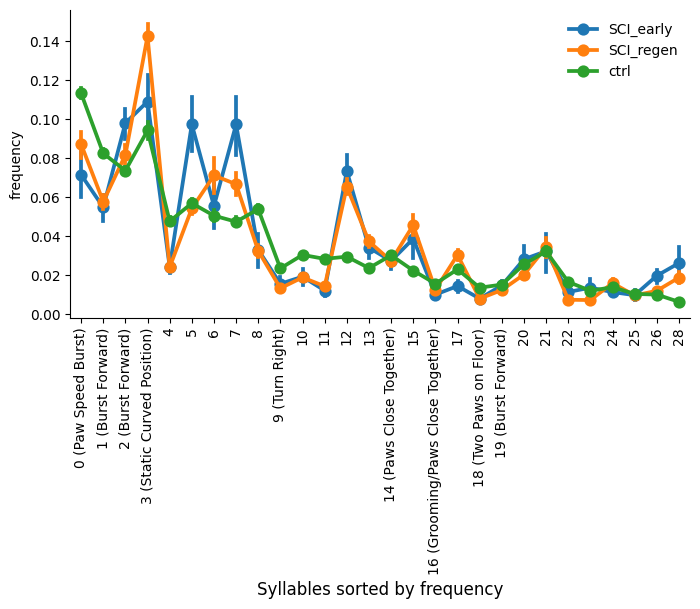

In [ ]:
kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=False,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='a',   # name of the control group for statistical testing
    exp_group='b',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size
    groups=stats_df['group'].unique(), # groups to be plotted
);

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

Group(s): SCI_early, SCI_regen, ctrl
Saved figure to /content/drive/MyDrive/All_project/2025_01_05-18_51_56/figures/transition_matrices.png


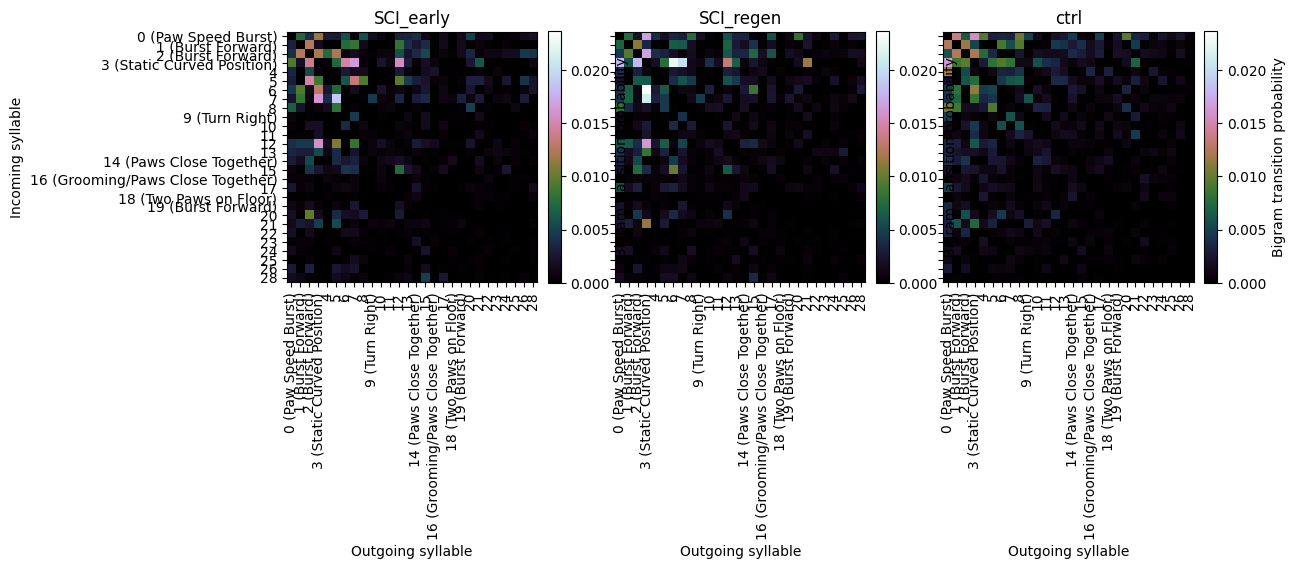

In [ ]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize,
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to /content/drive/MyDrive/All_project/2025_01_05-18_51_56/figures/transition_graphs.png


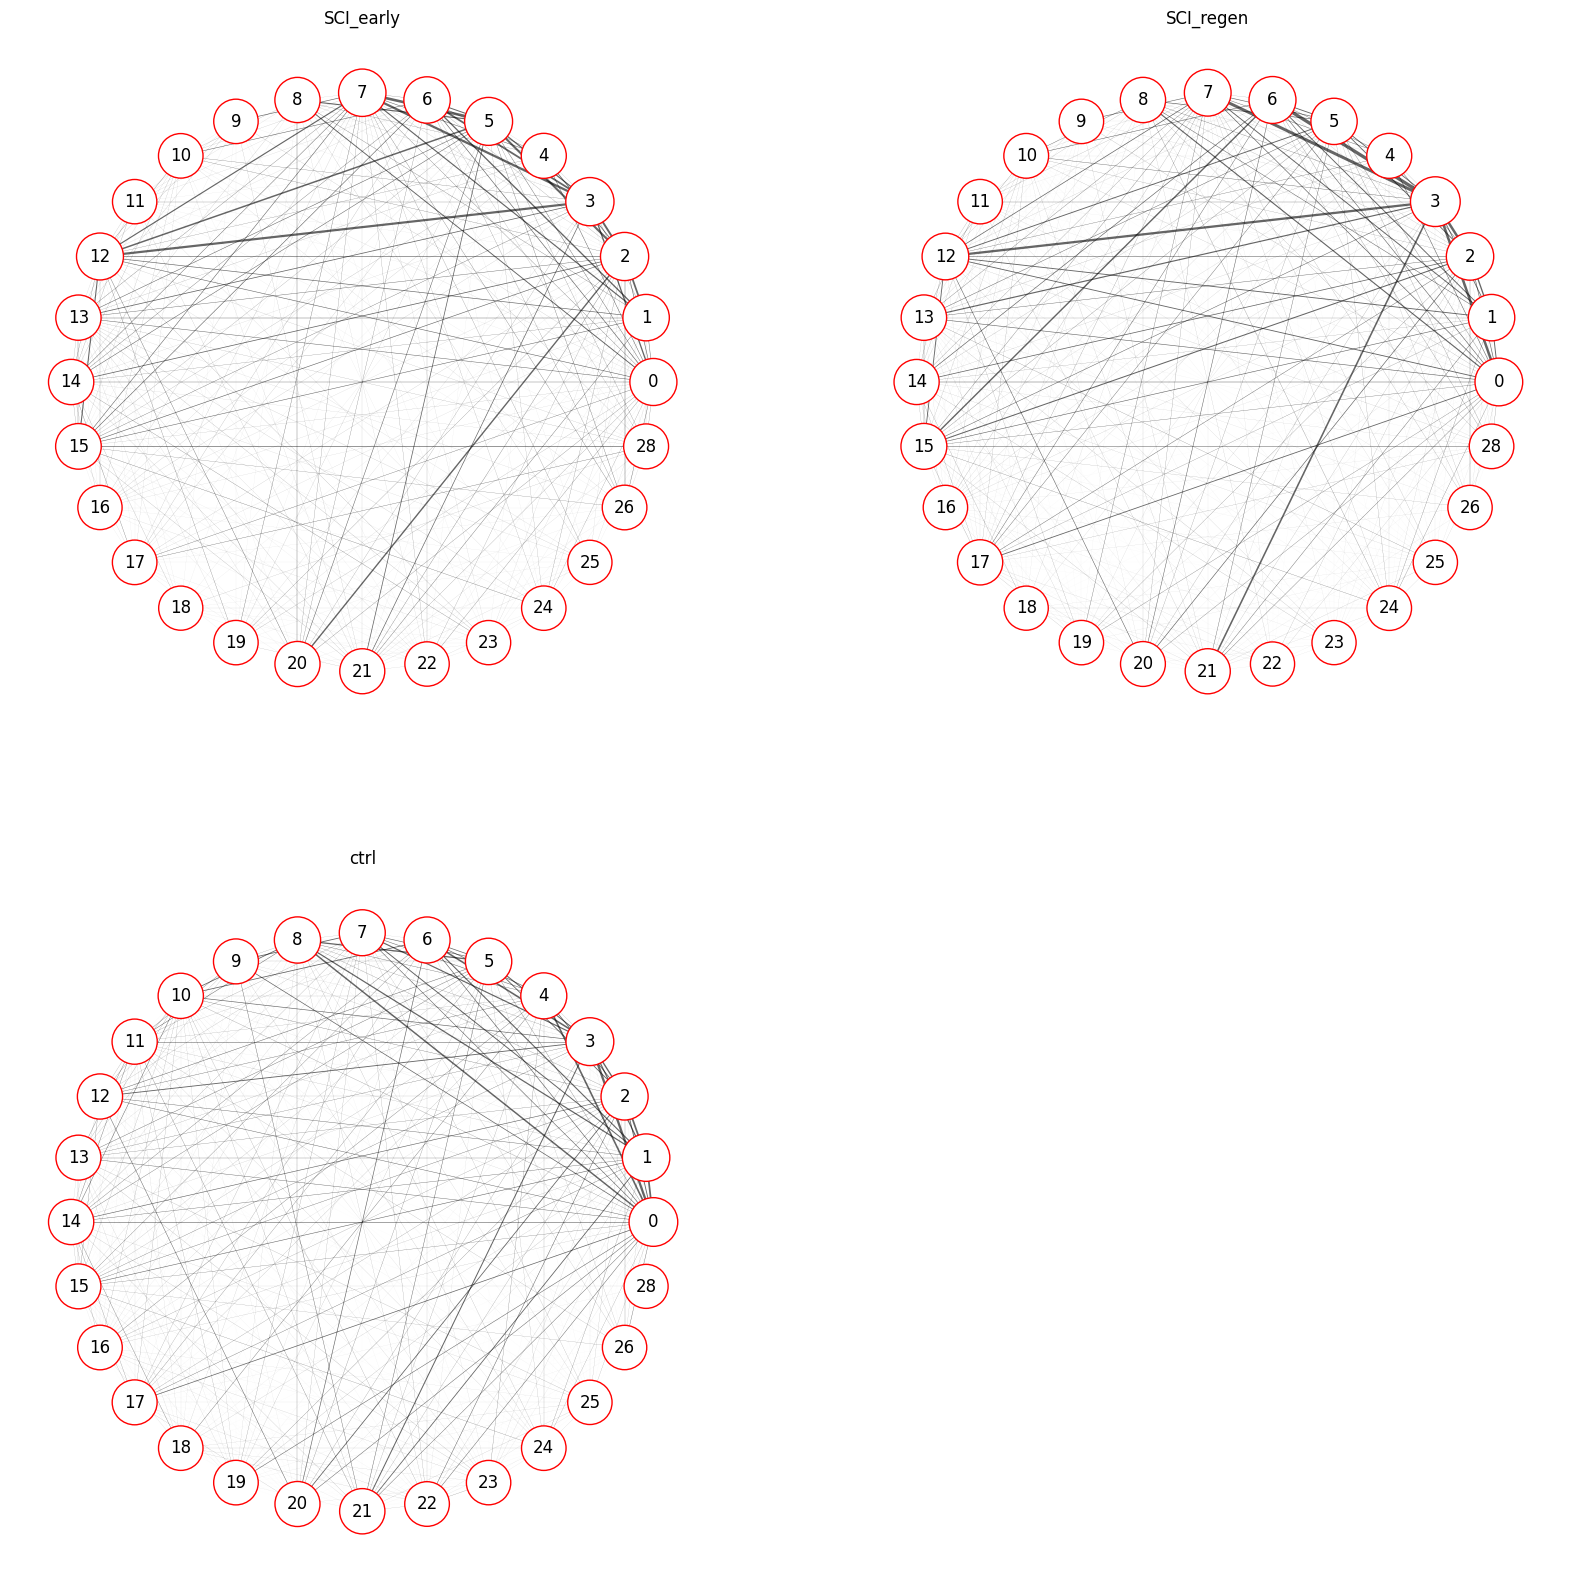

In [ ]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name,
    groups, trans_mats, usages, syll_include,
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to /content/drive/MyDrive/All_project/2025_01_05-18_51_56/figures/transition_graphs_diff.png


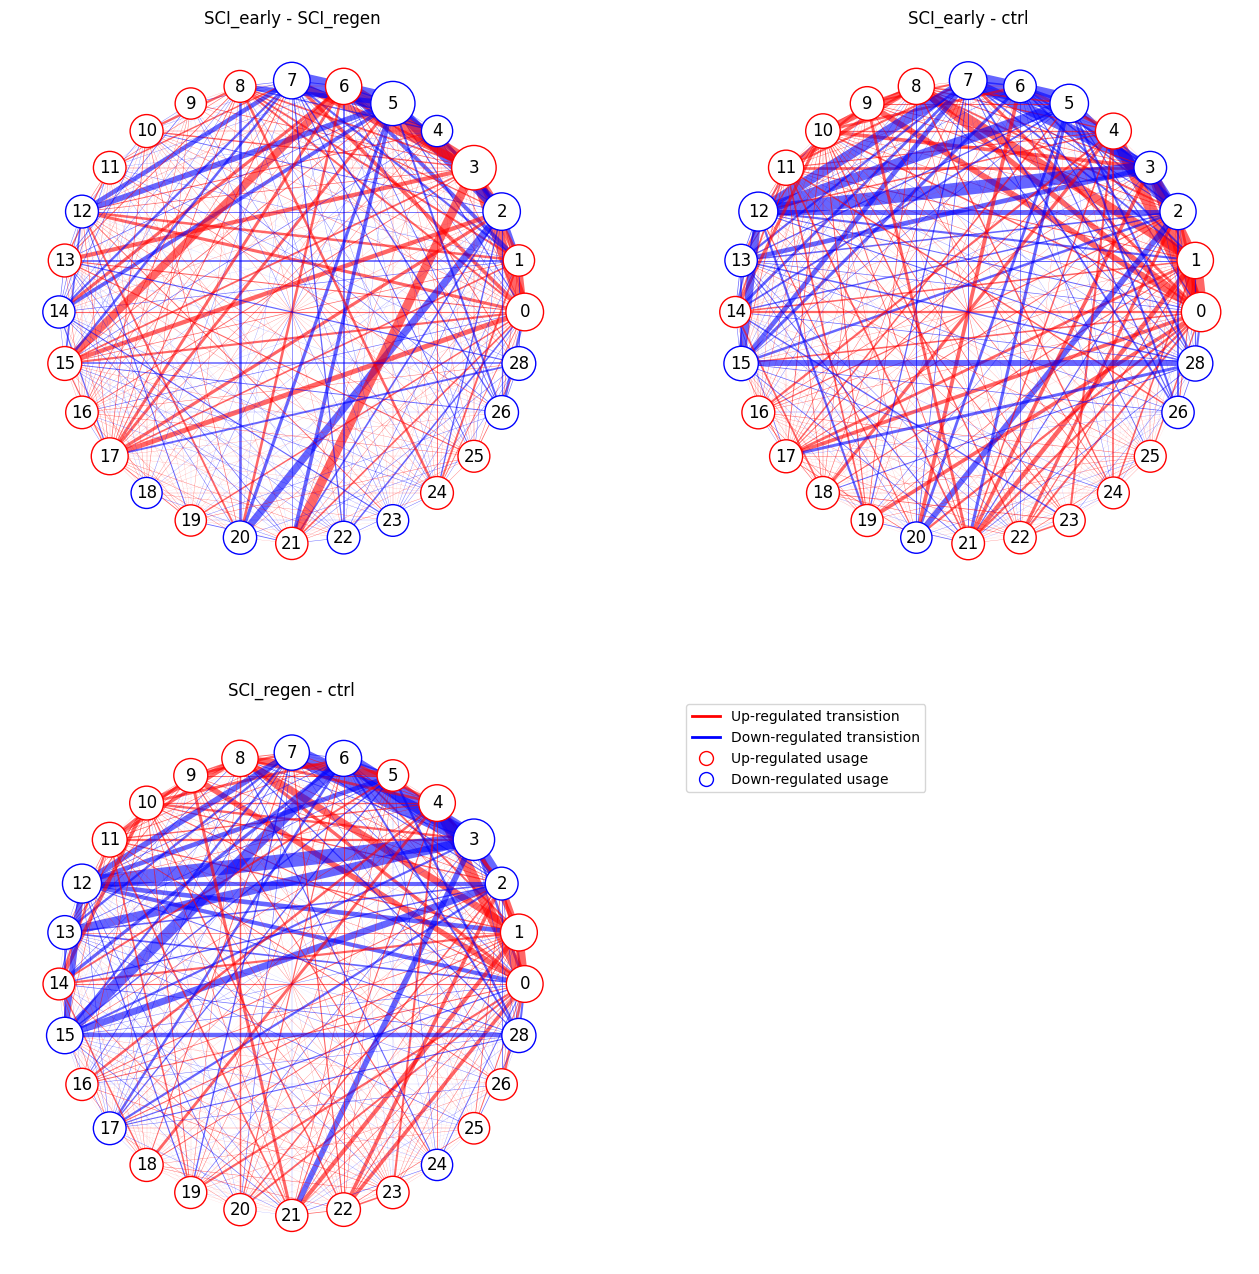

In [ ]:
# Generate a difference-graph for each pair of groups.

kpms.plot_transition_graph_difference(project_dir, model_name,
                                      groups, trans_mats, usages, syll_include,
                                      layout='circular') # transition graph layout ("circular" or "spring")